In [43]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import Dense,BatchNormalization
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt
data = np.load('fac_cond256_unit8.npz')
raw_X=data['cond']
raw_X=np.squeeze(raw_X)
raw_Y=data['fac']
raw_Y=raw_Y.astype(np.float64)
NUM_TIMESTEPS = 65
BATCH_SIZE = 128   
NUM_EPOCHS = 100
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(2000, 65) (1000, 65) (2000, 3) (1000, 3)


In [44]:
model = Sequential()
model.add(Dense(64,activation= 'sigmoid',input_shape=(65,)))
model.add(BatchNormalization())
model.add(Dense(128,activation= 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(256,activation= 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(100,activation= 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(3))
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 64)                4224      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dense_59 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
dense_60 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
dense_61 (Dense)             (None, 100)             

In [49]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
 


Epoch 1/100
16/16 [==============================] - 0s 4ms/step - loss: 0.2083 - mean_squared_error: 0.2083 - val_loss: 1.2655 - val_mean_squared_error: 1.2655
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2132 - mean_squared_error: 0.2132 - val_loss: 1.0424 - val_mean_squared_error: 1.0424
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1983 - mean_squared_error: 0.1983 - val_loss: 1.4306 - val_mean_squared_error: 1.4306
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2133 - mean_squared_error: 0.2133 - val_loss: 0.9112 - val_mean_squared_error: 0.9112
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2014 - mean_squared_error: 0.2014 - val_loss: 0.7033 - val_mean_squared_error: 0.7033
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1892 - mean_squared_error: 0.1892 - val_loss: 0.3732 - val_mean_squared_error: 0.3732
Epoch 7/100
16/16 [===============

16/16 [==============================] - 0s 3ms/step - loss: 0.1763 - mean_squared_error: 0.1763 - val_loss: 0.6304 - val_mean_squared_error: 0.6304
Epoch 52/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1762 - mean_squared_error: 0.1762 - val_loss: 0.7653 - val_mean_squared_error: 0.7653
Epoch 53/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1674 - mean_squared_error: 0.1674 - val_loss: 0.5597 - val_mean_squared_error: 0.5597
Epoch 54/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1653 - mean_squared_error: 0.1653 - val_loss: 1.2778 - val_mean_squared_error: 1.2778
Epoch 55/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1733 - mean_squared_error: 0.1733 - val_loss: 0.5197 - val_mean_squared_error: 0.5197
Epoch 56/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1774 - mean_squared_error: 0.1774 - val_loss: 1.2272 - val_mean_squared_error: 1.2272
Epoch 57/100
16/16 [=====================

In [52]:
print(history.history.keys())
acc = history.history['mean_squared_error']
acc_val = history.history['val_mean_squared_error']
print(acc,acc_val)
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])
[0.20827552676200867, 0.2131558656692505, 0.19831153750419617, 0.21331939101219177, 0.2013784795999527, 0.1892317831516266, 0.17704905569553375, 0.1820291131734848, 0.18738141655921936, 0.18501217663288116, 0.18630069494247437, 0.1784307211637497, 0.19143088161945343, 0.19255506992340088, 0.18026143312454224, 0.18397991359233856, 0.18098032474517822, 0.1792783886194229, 0.18556343019008636, 0.1782751828432083, 0.18309827148914337, 0.18573598563671112, 0.18827539682388306, 0.1842954307794571, 0.1805051565170288, 0.17430557310581207, 0.1869897097349167, 0.17518815398216248, 0.17628277838230133, 0.17637930810451508, 0.17500032484531403, 0.1785806119441986, 0.1834181696176529, 0.1776001900434494, 0.18363724648952484, 0.18944688141345978, 0.19751587510108948, 0.18443261086940765, 0.17587418854236603, 0.18592296540737152, 0.18781839311122894, 0.18039174377918243, 0.18258897960186005, 0.17777444422245026, 0.178965

In [47]:
ae=np.maximum(pre-Ytest,Ytest-pre)
mae0=np.mean(ae[0])
mae1=np.mean(ae[1])
mae2=np.mean(ae[2])
mse0 = math.sqrt(mae0)
mse1 = math.sqrt(mae1)
mse2 = math.sqrt(mae2)
print("\nMAE0: {:.3f}, MAE1: {:.3f}, MAE2: {:.3f},".format(mae0, mae1,mae2))
print("\nMSE0: {:.3f}, MSE1: {:.3f}, MSE2: {:.3f},".format(mse0, mse1,mse2))



MAE0: 0.689, MAE1: 0.287, MAE2: 1.134,

MSE0: 0.830, MSE1: 0.536, MSE2: 1.065,


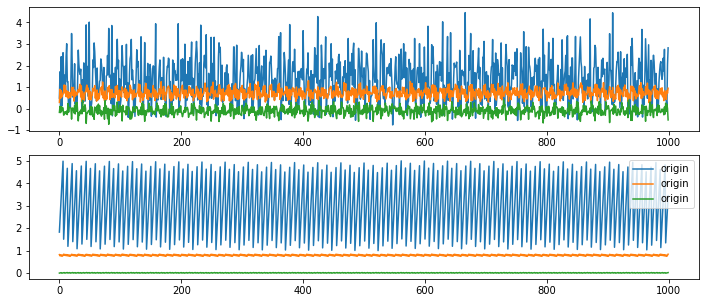

In [48]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()